In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


* You can see that there are three classes


1.   setosa
2.   versicolor
3.   virginica




In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df['species']=le.fit_transform(df['species'])

In [10]:
df['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [11]:
new_df=df[['sepal_length','petal_length','species']]



*   I reduce the column of the dataset as I want to show you the graph of the dataset.



In [12]:
new_df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [28]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]
print(x)
print(y)

     sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [29]:
import pandas as pd

In [30]:
x=x.to_numpy()

In [31]:
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [32]:
y=y.to_numpy()
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
import matplotlib.pyplot as plt

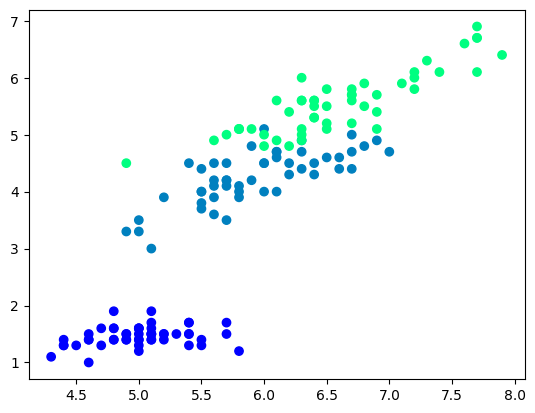

In [33]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter")

**You can see the graph is sort of linear and having 3 classes as we discussed earlier**
**so that we have to use softmax regression Logistic Regression will not work in this case.**



In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 2)
(120,)
(30, 2)
(30,)


In [36]:
from sklearn.linear_model import LogisticRegression



*   **You think why am I import Logistic Regression class??**
*   **So the answer is so simple, there is no separate class for apply Softmax Regression in sci-kit learn, there is one perameter named multi_class which is set to 'multinomial' to do Softmax Regression.**



In [38]:
smr=LogisticRegression(multi_class='multinomial')

***it is that much simple to implement***

In [39]:
smr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [41]:
y_predict=smr.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 1])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9

(-1.0, 8.0)

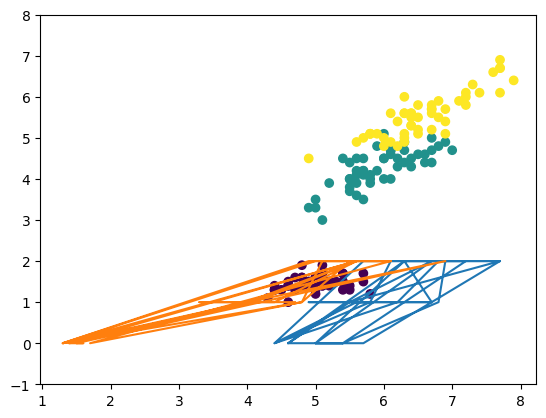

In [50]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,y_predict)
plt.ylim(-1,8)

**You can see we cannot plot the graph using matplotlib here so we have to find another way to plot the line.

*   *problem is that we have to plot graph between x[:,0],x[:,1] vs y_predict*



In [58]:
from mlxtend.plotting import plot_decision_regions

**we do it via mlxtend library**

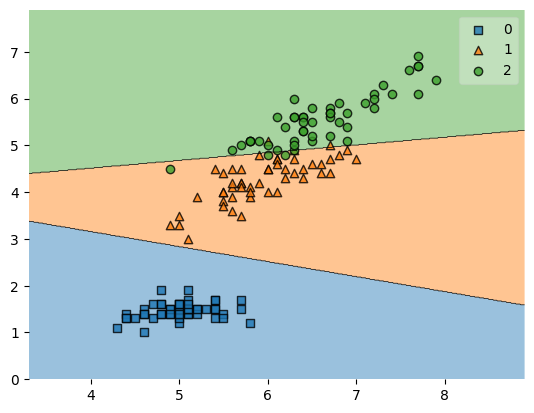

In [73]:
plot_decision_regions(x, y,smr)

plt.show()

note:-


*    here we are not making owr own class of Softmax Regression
as it required too many differentials and lot more calculation, and for understanding we done theoritical intution notes in the same repository , Thank You.

